## Model Evaluation and Refinement

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [191]:
Data = pd.read_csv('Automobiles_cleaned.csv',index_col=0)
['engine_size', 'curb_weight', 'horsepower', 'highway_mpg']

['engine_size', 'curb_weight', 'horsepower', 'highway_mpg']

In [192]:
df = Data._get_numeric_data()
df.head(2)

symboling  normalized_losses  wheel_base  length  width  height  \
0          3              122.0        88.6   168.8   64.1    48.8   
1          3              122.0        88.6   168.8   64.1    48.8   

   curb_weight  engine_size  bore  stroke  ...  highway_mpg    price  \
0         2548          130  3.47    2.68  ...           27  13495.0   
1         2548          130  3.47    2.68  ...           27  16500.0   

   fuel_type_diesel  fuel_type_gas  aspiration_std  aspiration_turbo  \
0                 0              1               1                 0   
1                 0              1               1                 0   

   num_of_doors_four  num_of_doors_two  highway_MPL_100km  city_MPL_100km  
0                  0                 1           8.711667       11.200714  
1                  0                 1           8.711667       11.200714  

[2 rows x 24 columns]

In [193]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Functions and plotting..

In [194]:
def distibutionplot(redfunction,bluefunction,redname,bluename,title):
    plt.figure(figsize=(12,10))
    ax1 = sns.distplot(redfunction,hist=False,color='r',label=redname)
    ax2 =sns.distplot(bluefunction,hist=False,color='b',label=bluename,ax=ax1)
    
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel('proportion of cars')
    plt.plot()
    plt.show()
    plt.close()

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
y_data = df.price
x_data = df.drop('price',axis=1)
x_train,x_val,y_train,y_val = train_test_split(x_data,y_data,test_size=0.4,random_state=1)

### Linear Regresion

In [197]:
from sklearn.linear_model import LinearRegression

test Data  0.6111827529454426
Train Data r2 score 0.6755325771980133
trained performed well


C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


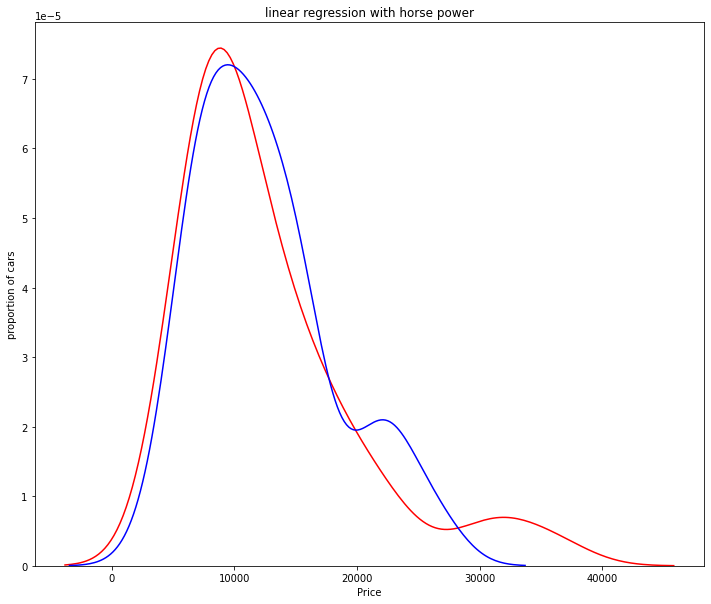

In [198]:
#creating a liner model...
lm = LinearRegression()

lm.fit(x_train[['horsepower']],y_train)
print('test Data ',lm.score(x_val[['horsepower']],y_val)) 
print('Train Data r2 score',lm.score(x_train[['horsepower']],y_train))
print('trained performed well')
#lets plot the distibution plot...
preds = lm.predict(x_val[['horsepower']])
distibutionplot(y_val,preds,'actual','predicted','linear regression with horse power')


### Cross validation

In [199]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [200]:
cv = cross_val_score(lm,x_data[['horsepower']],y_data,cv=4)
cv

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [201]:
print(cv.mean(),'' , cv.std())

0.522009915042119  0.2911839444756029


In [202]:
-1 * cross_val_score(lm,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error').round()

array([20254143., 43745493., 12539630., 17561928.])

C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


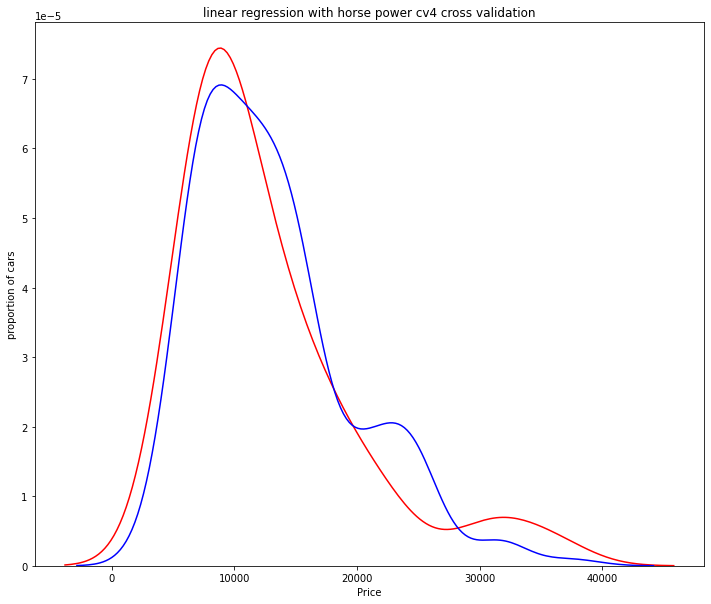

In [203]:
preds = cross_val_predict(lm,x_data[['horsepower']],y_data,cv=4)
distibutionplot(y_val,preds,'actual','predicted','linear regression with horse power cv4 cross validation')

### Overfitting and Under fitting with multivariable linear regression

In [204]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb_weight','engine_size','highway_mpg']],y_train)

LinearRegression()

In [205]:
preds_train = lr.predict(x_train[['horsepower','curb_weight','engine_size','highway_mpg']])

preds_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

Actual [9549.0, 6229.0, 10245.0, 7295.0, 9989.0]
predicted [11353.  5751. 11187.  6596. 15738.]


C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


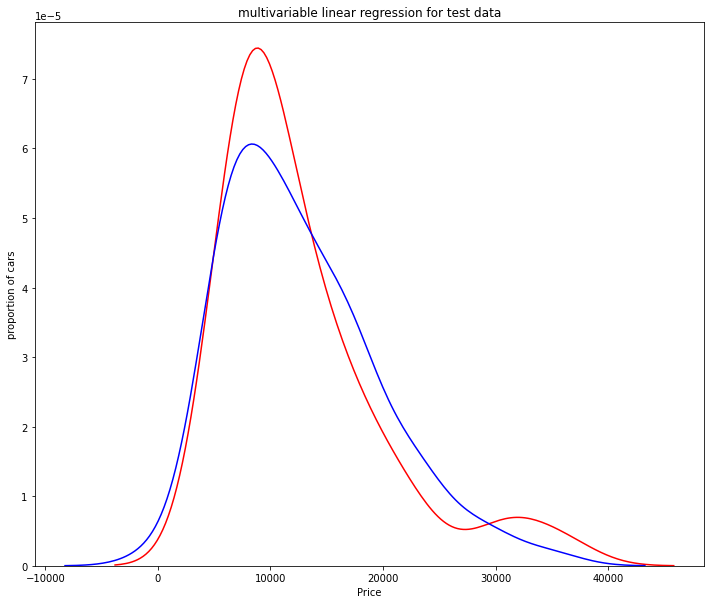

In [206]:
print('Actual',y_val.head(5).tolist())
preds_test = lr.predict(x_val[['horsepower','curb_weight','engine_size','highway_mpg']])
print('predicted',preds_test[0:5].round())
distibutionplot(y_val,preds_test,'actual','predicted','multivariable linear regression for test data')

Actual [9549.0, 6229.0, 10245.0, 7295.0, 9989.0]
predicted [26091.  7954. 26091. 19558.  5823.]


C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


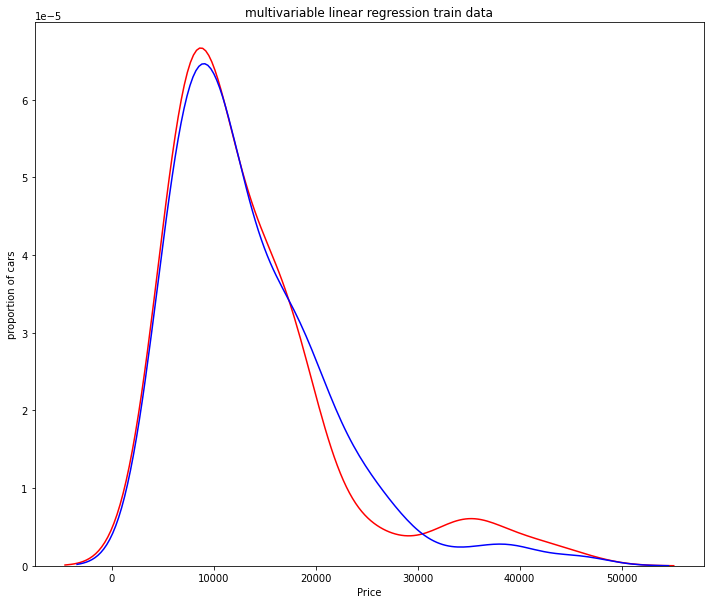

In [207]:
print('Actual',y_val.head(5).tolist())
print('predicted',preds_train[0:5].round())
distibutionplot(y_train,preds_train,'actual','predicted','multivariable linear regression train data')

## Plolynominal regression

In [208]:
def polyplot(xtrain,xtest,ytrain,ytest,lr,polytransform):
    plt.figure(figsize=(12, 8))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x= np.arange(xmin,xmax,0.1)
    
    plt.plot(xtrain,ytrain,'ro',label='Training Data')
    plt.plot(xtest,ytest,'go',label= 'Testing Data')
    plt.plot(x, lr.predict(polytransform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [209]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [210]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_val_pr = pr.fit_transform(x_test[['horsepower']])

In [211]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [212]:
preds = poly.predict(x_val_pr)[0:5].round()
print(preds)
print(y_train[0:5].tolist())

[ 6729.  7308. 12214. 18893. 19996.]
[16925.0, 18420.0, 5389.0, 19045.0, 7775.0]


## PolyPlot

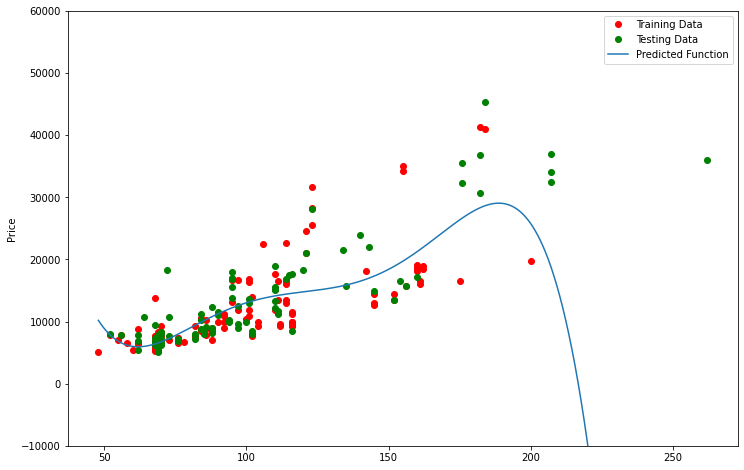

In [213]:
polyplot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [214]:
poly.score(x_train_pr,y_train)

0.5567716899817778

In [215]:
poly.score(x_val_pr,y_test) #this is not enough

-29.871838229908324

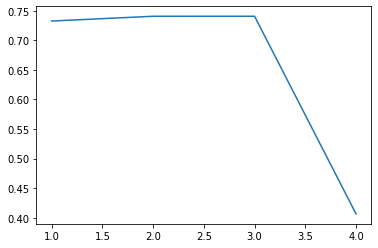

In [216]:
rq_test = []
d = [1,2,3,4]

for i in d:
    poly = PolynomialFeatures(degree=i)
    
    x_train_poly = poly.fit_transform(x_train[['horsepower']])
    x_test_poly = poly.fit_transform(x_test[['horsepower']])
    
    lm.fit(x_train_poly,y_train)
    rq_test.append(lm.score(x_test_poly,y_test))
    
plt.plot(d,rq_test)

In [217]:
def f(order,test_data):
    x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=test_data,random_state=0)
    
    poly = PolynomialFeatures(degree=order)
    
    x_train_pr = poly.fit_transform(x_train[['horsepower']])
    x_test_pr = poly.fit_transform(x_test[['horsepower']])
    
    lm = LinearRegression()
    
    poly.fit(x_train_pr,y_train)
    
    lm.fit(x_train_pr,y_train)
    polyplot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, lm,poly)
    
interact(f,order=(0,6,1),test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [218]:
poly_1 = PolynomialFeatures(degree=2)

x_train_poly = poly_1.fit_transform(x_train[['horsepower','engine_size','curb_weight','highway_mpg']])
x_test_poly = poly_1.fit_transform(x_test[['horsepower','engine_size','curb_weight','highway_mpg']])

In [219]:
pr = LinearRegression().fit(x_train_poly,y_train)

C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bala Krishna Baddi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


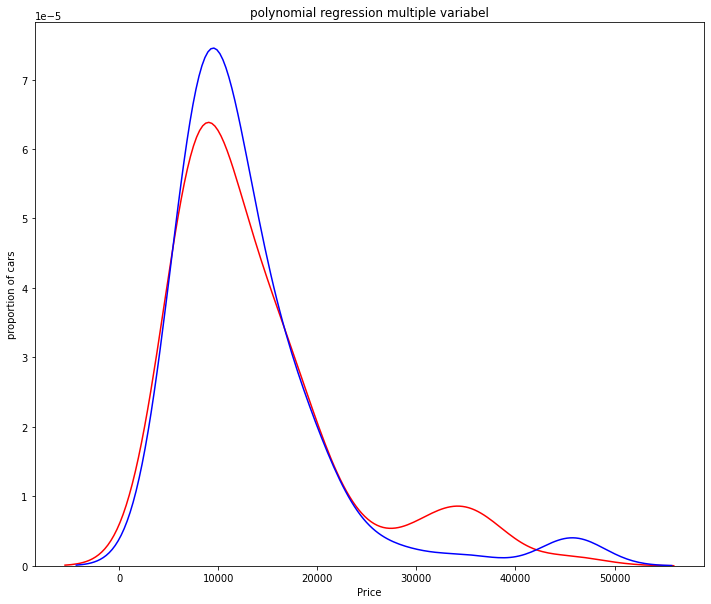

In [220]:
preds_poly = pr.predict(x_test_poly)

distibutionplot(y_test,preds_poly,'Actual','Predicted',"polynomial regression multiple variabel")

### Ridge Regression

In [221]:
from sklearn.linear_model import Ridge

In [222]:
pr = PolynomialFeatures(degree=2)

x_train_poly = poly_1.fit_transform(x_train[['horsepower','engine_size','curb_weight','highway_mpg']])
x_test_poly = poly_1.fit_transform(x_test[['horsepower','engine_size','curb_weight','highway_mpg']])

In [223]:
rm = Ridge(alpha=1)

In [224]:
rm.fit(x_train_poly,y_train)

Ridge(alpha=1)

In [225]:
preds = rm.predict(x_test_poly)
preds[0:5].round()

array([ 6338., 10446., 20633., 19300., 20519.])

In [226]:
y_test.head().tolist()

[6295.0, 10698.0, 13860.0, 13499.0, 15750.0]

In [227]:
rm.score(x_train_poly,y_train)

0.8530159418420764

In [228]:
rm.score(x_test_poly,y_test) #test score

0.6074652469245125

### lets test the diffrent alphas

In [229]:
from tqdm import tqdm

In [230]:
rq_test =[]
rq_train =[]

Alpha = 10* np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    rm = Ridge(alpha=alpha)
    
    rm.fit(x_train_poly,y_train)
    train_score,test_score = rm.score(x_train_poly,y_train),rm.score(x_test_poly,y_test)
    pbar.set_postfix({'Trained score':train_score,"Test score : ":test_score})
    rq_test.append(test_score)
    rq_train.append(train_score)

100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 168.80it/s, Trained score=0.848, Test score : =0.612]


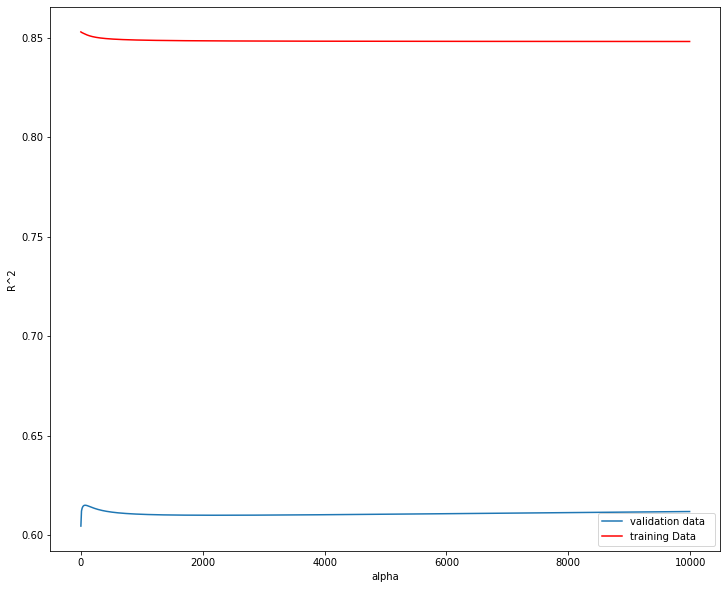

In [253]:
#plt.plot(alpha,rq_test,label = 'Testing Data')
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,rq_test, label='validation data  ')
plt.plot(Alpha,rq_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Grid searchCV

In [232]:
from sklearn.model_selection import GridSearchCV

In [235]:
RR = Ridge(alpha)

In [238]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [245]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)# iid=None

In [256]:
Grid1.fit(x_data[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']], y_data)
bes = Grid1.best_estimator_

In [258]:
bes.score(x_test[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']],y_test)

0.8411649831036149